# Data preparation 

## VP plant

Caso: Perdita fluido con aumento DTSH (delta t super heat, overheating) evap -setpoint livello da tenere

Periodo regolare: prima di agosto 2019

Fault: agosto2019-aprile2021 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the original dataset
VP = pd.read_feather(
    "/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/VP.feather"
    )

# Remove unnecessary variables
exclud_vars_vp = [
    "Ignore",
    "CONTAORE",
    "TOP",
    "TOT",
    "TOV",
    "TOFS",
    "HWP",
    "AUX_POT_ATT_KW",
    "AUX_TENSIONE",
    "GEN_ENERGY",
    "AUX_ENERGY",
    "Datapoints",
    "FV134"
]

VP = VP.rename(columns={'GEN_TENSIONE': 'GEN_TEN'})

VP = VP.drop(exclud_vars_vp, axis=1)
VP

,Date,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,...,ST102,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,XT100,PT212
0,2016-12-19 13:22:00,99.82639,303.6169,257.2185,285.1852,53.06713,91.44329,26.53357,277.9948,263.9178,...,3009.801,0.115741,114.53990,251.05610,209.33160,178.9496,100.0,94.84954,0.517940,330.2083
1,2016-12-19 13:23:00,99.79745,303.7182,257.1172,285.0839,52.96585,91.54456,26.63484,277.8935,263.9178,...,3009.801,0.104167,114.23610,251.25870,209.83800,178.9496,100.0,94.61806,0.703125,330.7292
2,2016-12-19 13:24:00,99.88426,303.7182,256.8134,284.9826,52.96585,91.94965,26.63484,277.8935,263.8166,...,3008.761,0.101273,114.23610,251.36000,209.02780,178.8484,100.0,94.90741,0.749421,330.5555
3,2016-12-19 13:25:00,100.00000,304.2245,257.2185,285.4890,52.96585,92.55729,26.63484,277.9948,263.9178,...,3009.801,0.127315,114.53990,251.46120,209.63540,178.7471,100.0,94.82060,0.630787,330.2083
4,2016-12-19 13:36:00,99.91319,304.2245,257.7249,285.7928,52.66204,92.96239,26.73611,278.6024,264.2216,...,3007.722,0.130208,115.24880,251.66380,210.04050,178.8484,100.0,94.70486,0.717593,331.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199847,2023-03-15 23:55:00,99.85532,298.9583,221.4691,262.7025,54.07986,82.12616,17.11516,252.1701,236.6754,...,3004.603,0.083912,26.12847,59.95370,81.32233,174.7975,0.0,75.72338,0.584491,347.3958
3199848,2023-03-15 23:56:00,99.91319,298.9583,221.4691,262.7025,53.26968,82.22743,17.11516,252.1701,236.5741,...,3002.523,0.078125,26.02720,59.95370,81.32233,174.5949,0.0,75.69444,0.570023,347.2222
3199849,2023-03-15 23:57:00,99.91319,299.0596,221.2665,262.7025,53.47222,82.02489,17.01389,252.0689,236.5741,...,3004.603,0.083912,26.02720,59.95370,81.32233,174.4936,0.0,75.75231,0.567130,347.5695
3199850,2023-03-15 23:58:00,99.91319,299.1609,221.2665,262.7025,54.38368,82.22743,17.01389,252.1701,236.5741,...,3004.603,0.083912,26.02720,59.85243,81.32233,174.3924,0.0,75.69444,0.561343,347.3958


In [2]:
VP.columns

Index(['Date', 'TOV_POS', 'TT100', 'TT101', 'TT102', 'TT103', 'TT104', 'TT105',
       'TT106', 'TT108', 'TT109', 'TT110', 'TT112', 'TT119', 'TT120', 'TT121',
       'TT122', 'TT123', 'TT124', 'TT125', 'TT126', 'TT210', 'TT212',
       'GEN_POT_ATT_KW', 'GEN_TEN', 'CPT104', 'CPT105', 'DPT113', 'IC113',
       'ST102', 'XT101', 'TT127', 'TT128', 'TT129', 'TT130', 'FCV134',
       'TOVSPOS', 'XT100', 'PT212'],
      dtype='object')

In [3]:
VP.shape

(3199852, 39)

In [4]:
VP_nonan = VP.dropna()
VP_nonan

,Date,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,...,ST102,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,XT100,PT212
0,2016-12-19 13:22:00,99.82639,303.6169,257.2185,285.1852,53.06713,91.44329,26.53357,277.9948,263.9178,...,3009.801,0.115741,114.53990,251.05610,209.33160,178.9496,100.0,94.84954,0.517940,330.2083
1,2016-12-19 13:23:00,99.79745,303.7182,257.1172,285.0839,52.96585,91.54456,26.63484,277.8935,263.9178,...,3009.801,0.104167,114.23610,251.25870,209.83800,178.9496,100.0,94.61806,0.703125,330.7292
2,2016-12-19 13:24:00,99.88426,303.7182,256.8134,284.9826,52.96585,91.94965,26.63484,277.8935,263.8166,...,3008.761,0.101273,114.23610,251.36000,209.02780,178.8484,100.0,94.90741,0.749421,330.5555
3,2016-12-19 13:25:00,100.00000,304.2245,257.2185,285.4890,52.96585,92.55729,26.63484,277.9948,263.9178,...,3009.801,0.127315,114.53990,251.46120,209.63540,178.7471,100.0,94.82060,0.630787,330.2083
4,2016-12-19 13:36:00,99.91319,304.2245,257.7249,285.7928,52.66204,92.96239,26.73611,278.6024,264.2216,...,3007.722,0.130208,115.24880,251.66380,210.04050,178.8484,100.0,94.70486,0.717593,331.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199847,2023-03-15 23:55:00,99.85532,298.9583,221.4691,262.7025,54.07986,82.12616,17.11516,252.1701,236.6754,...,3004.603,0.083912,26.12847,59.95370,81.32233,174.7975,0.0,75.72338,0.584491,347.3958
3199848,2023-03-15 23:56:00,99.91319,298.9583,221.4691,262.7025,53.26968,82.22743,17.11516,252.1701,236.5741,...,3002.523,0.078125,26.02720,59.95370,81.32233,174.5949,0.0,75.69444,0.570023,347.2222
3199849,2023-03-15 23:57:00,99.91319,299.0596,221.2665,262.7025,53.47222,82.02489,17.01389,252.0689,236.5741,...,3004.603,0.083912,26.02720,59.95370,81.32233,174.4936,0.0,75.75231,0.567130,347.5695
3199850,2023-03-15 23:58:00,99.91319,299.1609,221.2665,262.7025,54.38368,82.22743,17.01389,252.1701,236.5741,...,3004.603,0.083912,26.02720,59.85243,81.32233,174.3924,0.0,75.69444,0.561343,347.3958


In [10]:
# Calculate the IQR and bounds
#Q1 = VP.quantile(0.25)
#Q3 = VP.quantile(0.75)
#IQR = Q3 - Q1
#
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#
## Remove outliers
#X_no_outl = VP[(VP >= lower_bound) & (VP <= upper_bound)].drop('Date', axis=1)
#X_no_outl

,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,TT109,...,ST102,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,XT100,PT212
0,99.82639,303.6169,257.2185,285.1852,53.06713,91.44329,26.53357,277.9948,263.9178,207.1036,...,3009.801,NaN,114.5399,251.0561,209.3316,178.9496,100.0,94.84954,0.517940,330.2083
1,99.79745,303.7182,257.1172,285.0839,52.96585,91.54456,26.63484,277.8935,263.9178,206.5972,...,3009.801,NaN,114.2361,251.2587,209.8380,178.9496,100.0,94.61806,0.703125,330.7292
2,99.88426,303.7182,256.8134,284.9826,52.96585,91.94965,26.63484,277.8935,263.8166,206.3947,...,3008.761,NaN,114.2361,251.3600,209.0278,178.8484,100.0,94.90741,0.749421,330.5555
3,100.00000,304.2245,257.2185,285.4890,52.96585,92.55729,26.63484,277.9948,263.9178,206.9010,...,3009.801,NaN,114.5399,251.4612,209.6354,178.7471,100.0,94.82060,0.630787,330.2083
4,99.91319,304.2245,257.7249,285.7928,52.66204,92.96239,26.73611,278.6024,264.2216,207.8125,...,3007.722,NaN,115.2488,251.6638,210.0405,178.8484,100.0,94.70486,0.717593,331.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199847,99.85532,298.9583,221.4691,262.7025,54.07986,82.12616,17.11516,252.1701,236.6754,171.1516,...,3004.603,0.083912,NaN,NaN,NaN,174.7975,0.0,NaN,0.584491,347.3958
3199848,99.91319,298.9583,221.4691,262.7025,53.26968,82.22743,17.11516,252.1701,236.5741,170.9491,...,3002.523,0.078125,NaN,NaN,NaN,174.5949,0.0,NaN,0.570023,347.2222
3199849,99.91319,299.0596,221.2665,262.7025,53.47222,82.02489,17.01389,252.0689,236.5741,170.9491,...,3004.603,0.083912,NaN,NaN,NaN,174.4936,0.0,NaN,0.567130,347.5695
3199850,99.91319,299.1609,221.2665,262.7025,54.38368,82.22743,17.01389,252.1701,236.5741,170.7465,...,3004.603,0.083912,NaN,NaN,NaN,174.3924,0.0,NaN,0.561343,347.3958


In [20]:
# Assuming 'data' is your DataFrame
# Calculate the IQR and remove outliers for each numeric column
X_no_outl = VP.copy()  # Create a copy of the original DataFrame

for column in X_no_outl.select_dtypes(include='number').columns:
    Q1 = X_no_outl[column].quantile(0.025)
    Q3 = X_no_outl[column].quantile(0.975)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_no_outl = X_no_outl[(X_no_outl[column] >= lower_bound) & (X_no_outl[column] <= upper_bound)]

# Print the filtered DataFrame without outliers
X_no_outl

,Date,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,...,ST102,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,XT100,PT212
0,2016-12-19 13:22:00,99.82639,303.6169,257.2185,285.1852,53.06713,91.44329,26.53357,277.9948,263.9178,...,3009.801,0.115741,114.53990,251.05610,209.33160,178.9496,100.0,94.84954,0.517940,330.2083
1,2016-12-19 13:23:00,99.79745,303.7182,257.1172,285.0839,52.96585,91.54456,26.63484,277.8935,263.9178,...,3009.801,0.104167,114.23610,251.25870,209.83800,178.9496,100.0,94.61806,0.703125,330.7292
2,2016-12-19 13:24:00,99.88426,303.7182,256.8134,284.9826,52.96585,91.94965,26.63484,277.8935,263.8166,...,3008.761,0.101273,114.23610,251.36000,209.02780,178.8484,100.0,94.90741,0.749421,330.5555
3,2016-12-19 13:25:00,100.00000,304.2245,257.2185,285.4890,52.96585,92.55729,26.63484,277.9948,263.9178,...,3009.801,0.127315,114.53990,251.46120,209.63540,178.7471,100.0,94.82060,0.630787,330.2083
4,2016-12-19 13:36:00,99.91319,304.2245,257.7249,285.7928,52.66204,92.96239,26.73611,278.6024,264.2216,...,3007.722,0.130208,115.24880,251.66380,210.04050,178.8484,100.0,94.70486,0.717593,331.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199847,2023-03-15 23:55:00,99.85532,298.9583,221.4691,262.7025,54.07986,82.12616,17.11516,252.1701,236.6754,...,3004.603,0.083912,26.12847,59.95370,81.32233,174.7975,0.0,75.72338,0.584491,347.3958
3199848,2023-03-15 23:56:00,99.91319,298.9583,221.4691,262.7025,53.26968,82.22743,17.11516,252.1701,236.5741,...,3002.523,0.078125,26.02720,59.95370,81.32233,174.5949,0.0,75.69444,0.570023,347.2222
3199849,2023-03-15 23:57:00,99.91319,299.0596,221.2665,262.7025,53.47222,82.02489,17.01389,252.0689,236.5741,...,3004.603,0.083912,26.02720,59.95370,81.32233,174.4936,0.0,75.75231,0.567130,347.5695
3199850,2023-03-15 23:58:00,99.91319,299.1609,221.2665,262.7025,54.38368,82.22743,17.01389,252.1701,236.5741,...,3004.603,0.083912,26.02720,59.85243,81.32233,174.3924,0.0,75.69444,0.561343,347.3958


In [23]:
#X_clean = pd.concat([X_no_outl, VP['Date']], axis=1)

X_clean = X_no_outl.dropna().drop_duplicates()
X_clean

,Date,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,...,ST102,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,XT100,PT212
0,2016-12-19 13:22:00,99.82639,303.6169,257.2185,285.1852,53.06713,91.44329,26.53357,277.9948,263.9178,...,3009.801,0.115741,114.53990,251.05610,209.33160,178.9496,100.0,94.84954,0.517940,330.2083
1,2016-12-19 13:23:00,99.79745,303.7182,257.1172,285.0839,52.96585,91.54456,26.63484,277.8935,263.9178,...,3009.801,0.104167,114.23610,251.25870,209.83800,178.9496,100.0,94.61806,0.703125,330.7292
2,2016-12-19 13:24:00,99.88426,303.7182,256.8134,284.9826,52.96585,91.94965,26.63484,277.8935,263.8166,...,3008.761,0.101273,114.23610,251.36000,209.02780,178.8484,100.0,94.90741,0.749421,330.5555
3,2016-12-19 13:25:00,100.00000,304.2245,257.2185,285.4890,52.96585,92.55729,26.63484,277.9948,263.9178,...,3009.801,0.127315,114.53990,251.46120,209.63540,178.7471,100.0,94.82060,0.630787,330.2083
4,2016-12-19 13:36:00,99.91319,304.2245,257.7249,285.7928,52.66204,92.96239,26.73611,278.6024,264.2216,...,3007.722,0.130208,115.24880,251.66380,210.04050,178.8484,100.0,94.70486,0.717593,331.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199847,2023-03-15 23:55:00,99.85532,298.9583,221.4691,262.7025,54.07986,82.12616,17.11516,252.1701,236.6754,...,3004.603,0.083912,26.12847,59.95370,81.32233,174.7975,0.0,75.72338,0.584491,347.3958
3199848,2023-03-15 23:56:00,99.91319,298.9583,221.4691,262.7025,53.26968,82.22743,17.11516,252.1701,236.5741,...,3002.523,0.078125,26.02720,59.95370,81.32233,174.5949,0.0,75.69444,0.570023,347.2222
3199849,2023-03-15 23:57:00,99.91319,299.0596,221.2665,262.7025,53.47222,82.02489,17.01389,252.0689,236.5741,...,3004.603,0.083912,26.02720,59.95370,81.32233,174.4936,0.0,75.75231,0.567130,347.5695
3199850,2023-03-15 23:58:00,99.91319,299.1609,221.2665,262.7025,54.38368,82.22743,17.01389,252.1701,236.5741,...,3004.603,0.083912,26.02720,59.85243,81.32233,174.3924,0.0,75.69444,0.561343,347.3958


In [24]:
X_clean['Date'] = pd.to_datetime(X_clean['Date'])

X_clean.set_index('Date', inplace=True)

VP_proc = X_clean.loc[:'2021-04-30'] \
    .resample('D') \
    .mean() \
    .apply(lambda x: x.fillna(x.median()), axis=0) \
    .round(3)
    
VP_proc = VP_proc[(VP_proc['GEN_POT_ATT_KW'] > 100)]

VP_proc.head()

,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,TT109,...,ST102,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,XT100,PT212
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-19,99.924,301.698,256.115,283.778,52.128,92.500,25.753,276.338,262.550,205.527,...,3009.079,0.112,115.446,248.511,209.550,177.491,100.0,95.056,0.625,330.988
2016-12-20,99.908,301.435,256.029,283.598,52.817,92.607,23.861,276.040,262.411,205.557,...,3008.693,0.115,115.908,249.220,210.563,177.306,100.0,95.026,0.637,330.705
2016-12-21,98.078,296.972,253.038,279.925,52.951,92.038,23.101,271.637,258.628,202.946,...,3007.618,0.102,117.800,245.668,210.854,174.188,100.0,95.005,0.620,330.673
2016-12-22,99.122,299.707,254.885,282.179,53.109,92.243,22.216,274.271,260.812,204.493,...,3008.002,0.109,116.743,247.888,210.960,174.843,100.0,95.050,0.647,330.265
2016-12-23,99.924,303.317,257.060,285.030,53.289,92.628,22.741,277.631,263.479,206.411,...,3008.703,0.143,115.453,249.543,209.697,176.929,100.0,95.028,0.675,330.354


In [25]:
VP_proc.shape

(1537, 38)

In [26]:
VP_proc.columns

Index(['TOV_POS', 'TT100', 'TT101', 'TT102', 'TT103', 'TT104', 'TT105',
       'TT106', 'TT108', 'TT109', 'TT110', 'TT112', 'TT119', 'TT120', 'TT121',
       'TT122', 'TT123', 'TT124', 'TT125', 'TT126', 'TT210', 'TT212',
       'GEN_POT_ATT_KW', 'GEN_TEN', 'CPT104', 'CPT105', 'DPT113', 'IC113',
       'ST102', 'XT101', 'TT127', 'TT128', 'TT129', 'TT130', 'FCV134',
       'TOVSPOS', 'XT100', 'PT212'],
      dtype='object')

In [27]:
VP_proc = VP_proc.reset_index()
VP_proc['Fault'] = np.where(
    (VP_proc['Date'] >= '2019-08-01') & (VP_proc['Date'] <= '2021-04-30'), 1, 0
)

VP_proc = VP_proc.drop(['Date'], axis=1)

# Export the processed dataset
path_x = "/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/VP.csv"
VP_proc.to_csv(path_x, index=False)

In [28]:
data = pd.read_csv("/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/VP.csv")
data

,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,TT109,...,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,XT100,PT212,Fault
0,99.924,301.698,256.115,283.778,52.128,92.500,25.753,276.338,262.550,205.527,...,0.112,115.446,248.511,209.550,177.491,100.000,95.056,0.625,330.988,0
1,99.908,301.435,256.029,283.598,52.817,92.607,23.861,276.040,262.411,205.557,...,0.115,115.908,249.220,210.563,177.306,100.000,95.026,0.637,330.705,0
2,98.078,296.972,253.038,279.925,52.951,92.038,23.101,271.637,258.628,202.946,...,0.102,117.800,245.668,210.854,174.188,100.000,95.005,0.620,330.673,0
3,99.122,299.707,254.885,282.179,53.109,92.243,22.216,274.271,260.812,204.493,...,0.109,116.743,247.888,210.960,174.843,100.000,95.050,0.647,330.265,0
4,99.924,303.317,257.060,285.030,53.289,92.628,22.741,277.631,263.479,206.411,...,0.143,115.453,249.543,209.697,176.929,100.000,95.028,0.675,330.354,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,99.057,294.868,254.723,280.686,53.830,91.436,20.368,271.429,258.003,202.489,...,0.075,125.798,243.518,217.546,170.561,100.000,99.368,0.466,330.365,1
1533,96.776,255.715,238.177,253.520,50.050,73.318,21.508,246.321,235.628,194.682,...,0.081,138.498,183.116,194.462,194.727,78.829,77.751,0.462,359.264,1
1534,99.820,278.450,254.696,275.835,49.836,82.879,21.979,267.957,257.326,207.109,...,0.077,153.651,212.778,222.843,205.592,100.000,99.634,0.436,359.663,1
1535,99.077,284.273,256.796,281.104,49.882,87.102,21.158,272.666,261.716,207.045,...,0.074,147.317,216.745,224.431,205.466,100.000,99.520,0.397,359.842,1


In [29]:
X0 = data[data['Fault'] == 0].drop(['Fault'], axis=1)
X1 = data[data['Fault'] == 1].drop(['Fault'], axis=1)


def corr_selection(data, thresh):
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Select features based on a threshold (e.g., 0.7)
    threshold = thresh
    highly_correlated = set()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                mean_corr_i = abs(correlation_matrix[colname_i]).mean()
                mean_corr_j = abs(correlation_matrix[colname_j]).mean()

                if mean_corr_i > mean_corr_j:
                    highly_correlated.add(colname_j)
                else:
                    highly_correlated.add(colname_i)

    return list(highly_correlated)


highcorr_X0 = corr_selection(X0, 0.75)
#highcorr_X1 = corr_selection(X1, 0.7)

data_0 = X0.drop(highcorr_X0, axis=1)
data_1 = X1.drop(highcorr_X0, axis=1)

#keep = list(np.unique(list(data_0.columns) + list(data_1.columns)))

data_keep = data[list(data_0.columns)]

data_keep

,TOV_POS,TT102,TT103,TT125,TT126,GEN_TEN,DPT113,ST102,XT101,TT127,TT129,TT130,FCV134,PT212
0,99.924,283.778,52.128,66.727,47.757,665.037,2799.933,3009.079,0.112,115.446,209.550,177.491,100.000,330.988
1,99.908,283.598,52.817,64.279,48.163,667.813,2800.006,3008.693,0.115,115.908,210.563,177.306,100.000,330.705
2,98.078,279.925,52.951,61.400,48.543,667.282,2799.655,3007.618,0.102,117.800,210.854,174.188,100.000,330.673
3,99.122,282.179,53.109,61.557,48.746,666.667,2799.851,3008.002,0.109,116.743,210.960,174.843,100.000,330.265
4,99.924,285.030,53.289,63.631,48.376,668.521,2800.148,3008.703,0.143,115.453,209.697,176.929,100.000,330.354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,99.057,280.686,53.830,55.120,54.015,668.718,2800.034,3005.616,0.075,125.798,217.546,170.561,100.000,330.365
1533,96.776,253.520,50.050,40.911,26.784,671.585,2714.144,2954.183,0.081,138.498,194.462,194.727,78.829,359.264
1534,99.820,275.835,49.836,47.948,31.876,671.135,2699.626,3002.291,0.077,153.651,222.843,205.592,100.000,359.663
1535,99.077,281.104,49.882,49.041,28.195,670.809,2700.116,3003.646,0.074,147.317,224.431,205.466,100.000,359.842


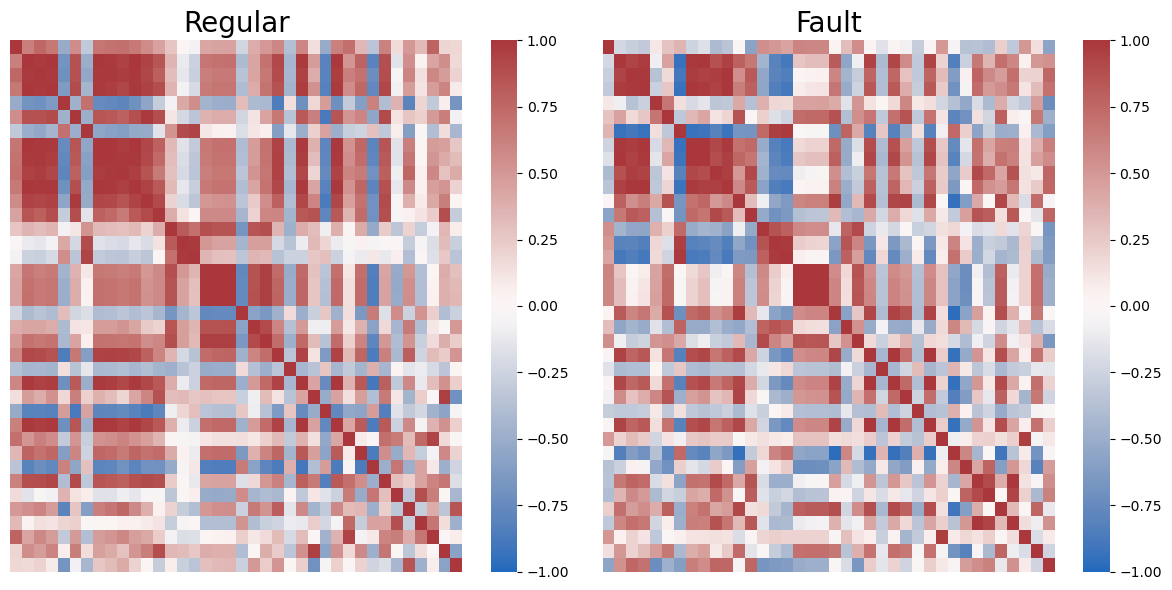

In [30]:
VP_proc_corr_0 = VP_proc[VP_proc['Fault'] == 0].drop('Fault', axis=1).corr()
VP_proc_corr_1 = VP_proc[VP_proc['Fault'] == 1].drop('Fault', axis=1).corr()


# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

pal = sns.color_palette("vlag", as_cmap=True)

# Plotting first heatmap on the first subplot
sns.heatmap(VP_proc_corr_0.corr(), ax=axes[0], annot=False, cmap=pal, vmin=-1, vmax=1, xticklabels=False, yticklabels=False)
axes[0].set_title('Regular', fontsize=20)

# Plotting second heatmap on the second subplot
sns.heatmap(VP_proc_corr_1.corr(), ax=axes[1], annot=False, cmap=pal, vmin=-1, vmax=1, xticklabels=False, yticklabels=False)
axes[1].set_title('Fault', fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
#plt.suptitle('Correlation maps for all features', fontsize=16, y=1.05)
plt.savefig('data_all_corr.png', bbox_inches='tight')
plt.show()

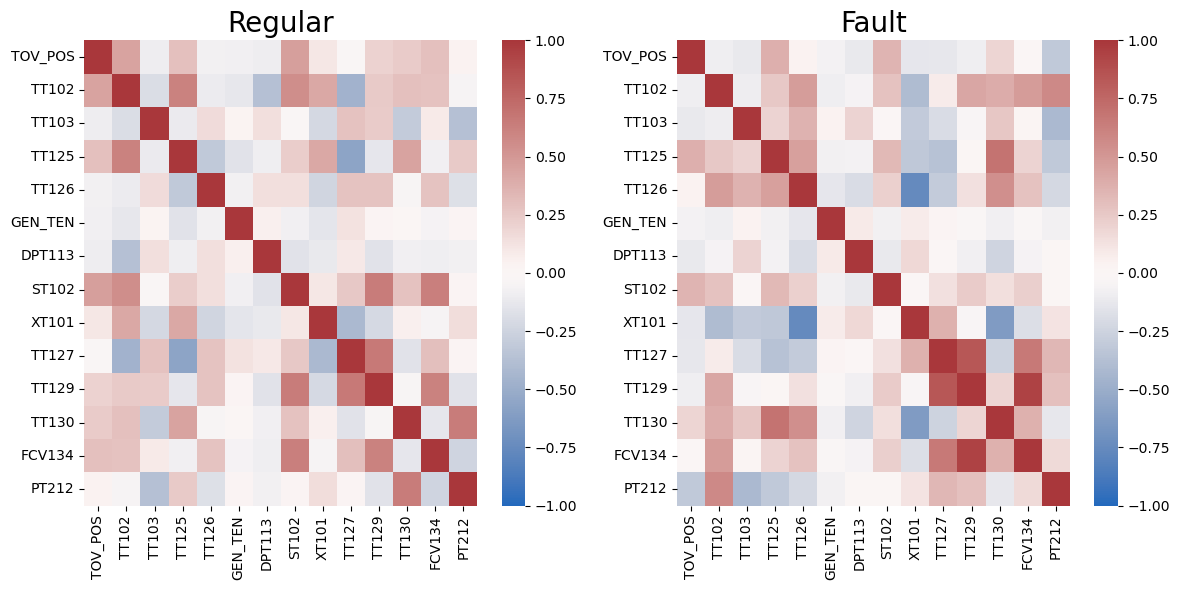

In [31]:

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

pal = sns.color_palette("vlag", as_cmap=True)

# Plotting first heatmap on the first subplot
sns.heatmap(data_0.corr(), ax=axes[0], annot=False, cmap=pal, vmin=-1, vmax=1)#, xticklabels=False, yticklabels=False)
axes[0].set_title('Regular', fontsize=20)

# Plotting second heatmap on the second subplot
sns.heatmap(data_1.corr(), ax=axes[1], annot=False, cmap=pal, vmin=-1, vmax=1)#, xticklabels=False, yticklabels=False)
axes[1].set_title('Fault', fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
#plt.suptitle('Correlation maps for selected features', fontsize=15, y=1.05)
plt.savefig('data_select_corr.png', bbox_inches='tight')
plt.show()

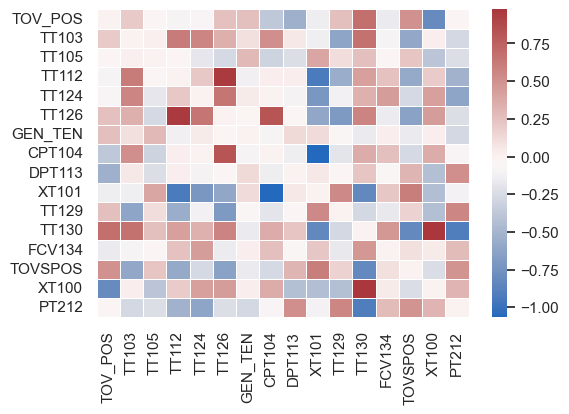

In [39]:
delta_corr = data_1.corr() - data_0.corr()

plt.figure(figsize=(6, 4))
palette = sns.color_palette("vlag", as_cmap=True)

sns.set_theme(style="white")
#palette = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(delta_corr, linewidths=.5, cmap=palette)

#DAG_hm.set_xticklabels(data.columns.drop('Fault'), rotation=90)
#DAG_hm.set_yticklabels(data.columns.drop('Fault'), rotation=0)

#plt.title('Correlation delta between operational periods', y=1.05)

plt.savefig('delta_corr.png', bbox_inches='tight')
plt.show()

In [40]:
X = data_keep
fault = data['Fault']

X.shape

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled

,TOV_POS,TT103,TT105,TT112,TT124,TT126,GEN_TEN,CPT104,DPT113,XT101,TT129,TT130,FCV134,TOVSPOS,XT100,PT212
0,1.765200,-0.820087,0.965965,0.773948,1.337211,-1.128067,-0.814951,0.883274,0.368360,0.531226,-1.422122,-0.058423,0.186426,-3.608624,1.342956,-0.025783
1,1.765200,-0.924606,0.671964,0.731663,1.034742,-1.116213,-0.051364,0.845848,0.279074,0.821848,-1.347566,-0.090250,0.186426,-3.680447,1.249340,-0.061000
2,1.925981,-0.404904,0.550904,0.533631,0.279106,-1.101581,-0.034452,0.368861,0.441199,-0.340642,-1.245898,-0.334857,0.186426,-3.698403,1.062110,-0.075653
3,1.675162,-0.548918,0.397952,0.606220,0.666726,-1.040273,0.695733,0.660309,0.517092,0.821848,-1.421856,-0.229914,0.186426,-3.670571,1.331254,-0.100589
4,1.874531,-0.718459,0.341801,0.750339,0.659528,-1.247719,0.620051,0.810014,0.398905,1.693716,-1.336003,-0.161800,0.186426,-3.637353,1.459975,-0.072172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445
1588,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445
1589,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445
1590,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445


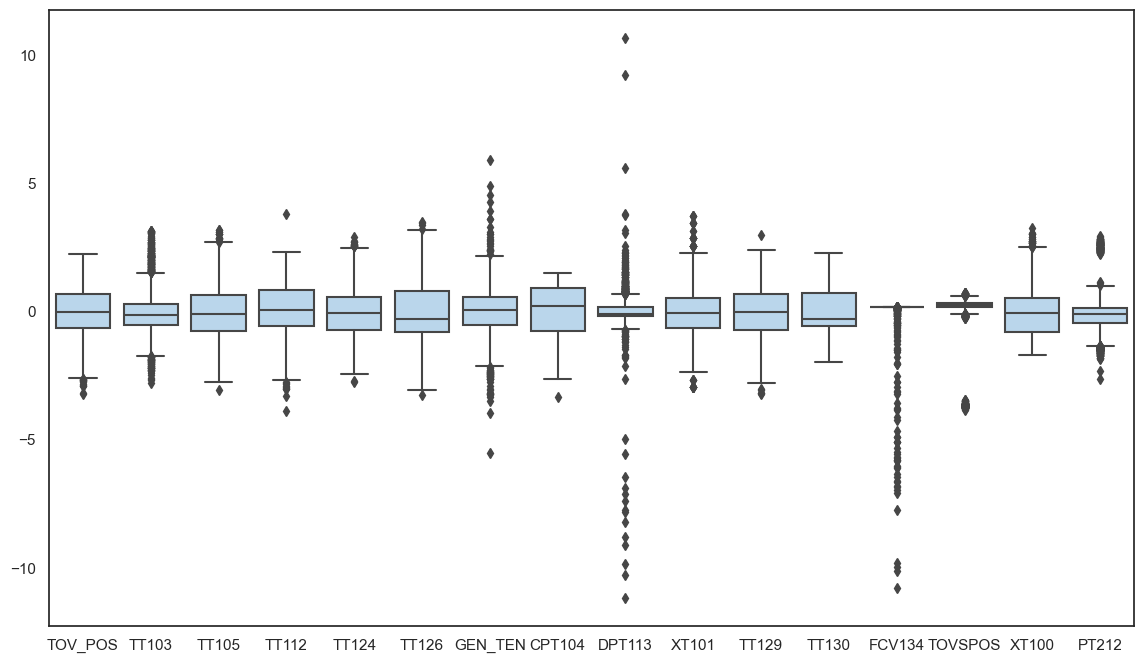

In [41]:
plt.figure(figsize=(14, 8))
col = sns.color_palette('Blues')[1]
sns.boxplot(X_scaled, boxprops=dict(facecolor=col))
#plt.title('Scaled features distribution', fontsize=16, y=1.05)
plt.savefig('feat_boxplots.png', bbox_inches='tight')
plt.show()

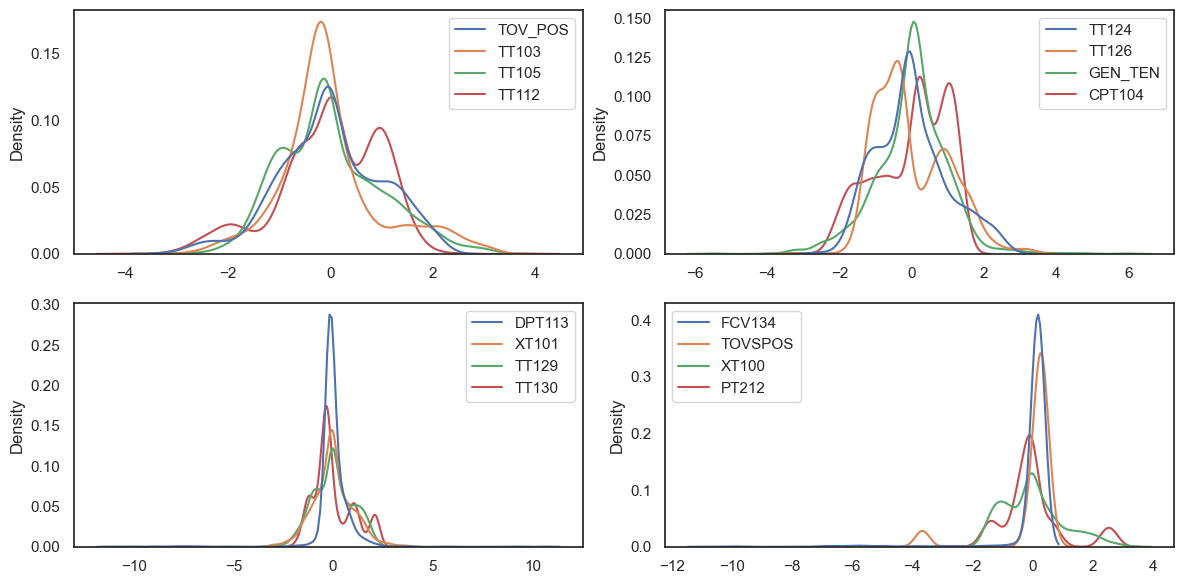

In [42]:
# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plotting first heatmap on the first subplot
sns.kdeplot(X_scaled.iloc[:, :4], ax=axes[0,0])
sns.kdeplot(X_scaled.iloc[:, 4:8], ax=axes[0,1])
sns.kdeplot(X_scaled.iloc[:, 8:12], ax=axes[1,0])
sns.kdeplot(X_scaled.iloc[:, 12:16], ax=axes[1,1])

# Adjust layout to prevent overlap
plt.tight_layout()
#plt.suptitle('KDE Plots for feature subsets', fontsize=16, y = 1.05)
plt.savefig('kdeplots.png', bbox_inches='tight')
plt.show()

In [43]:
#X_final = X_scaled.drop(['TOFS', 'TOFS', 'DPT113', 'FCV134', 'TOVSPOS'], axis=1)
X_final = X_scaled
data_processed = pd.concat([X_final, fault], axis=1)

# Export the processed dataset
path_x = "/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/data_processed.csv"
data_processed.to_csv(path_x, index=False)

data_processed

,TOV_POS,TT103,TT105,TT112,TT124,TT126,GEN_TEN,CPT104,DPT113,XT101,TT129,TT130,FCV134,TOVSPOS,XT100,PT212,Fault
0,1.765200,-0.820087,0.965965,0.773948,1.337211,-1.128067,-0.814951,0.883274,0.368360,0.531226,-1.422122,-0.058423,0.186426,-3.608624,1.342956,-0.025783,0
1,1.765200,-0.924606,0.671964,0.731663,1.034742,-1.116213,-0.051364,0.845848,0.279074,0.821848,-1.347566,-0.090250,0.186426,-3.680447,1.249340,-0.061000,0
2,1.925981,-0.404904,0.550904,0.533631,0.279106,-1.101581,-0.034452,0.368861,0.441199,-0.340642,-1.245898,-0.334857,0.186426,-3.698403,1.062110,-0.075653,0
3,1.675162,-0.548918,0.397952,0.606220,0.666726,-1.040273,0.695733,0.660309,0.517092,0.821848,-1.421856,-0.229914,0.186426,-3.670571,1.331254,-0.100589,0
4,1.874531,-0.718459,0.341801,0.750339,0.659528,-1.247719,0.620051,0.810014,0.398905,1.693716,-1.336003,-0.161800,0.186426,-3.637353,1.459975,-0.072172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445,1
1588,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445,1
1589,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445,1
1590,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445,1
